In [1]:
from pylab import *
%matplotlib inline
plt.style.use('dark_background')
from mayavi import mlab
#%qtconsole --style monokai
mlab.init_notebook()

Notebook initialized with x3d backend.


# 1. Load Data

In [2]:
temp = np.genfromtxt("data/input.txt")[1:,:]
data_points = temp[:,0:3]
data_weights = temp[:,3]

In [3]:
mybins = np.arange(-8.1,8,0.2)
sums, edges = np.histogramdd(data_points,(mybins,mybins,mybins), weights=data_weights)
count, edges = np.histogramdd(data_points,(mybins,mybins,mybins))

H = np.nan_to_num(sums/(count+1e-8))
image = np.exp(100*H)
H.tofile("data/output_hist.dat")
image.tofile("data/output_img.dat")

# 2. Plot Density

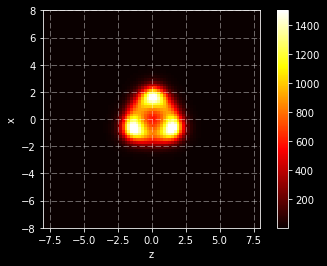

In [4]:
plt.imshow(image[:,40,:].T,cmap="hot",origin="lower",vmin=1,vmax=1500,extent=(-8,8,-8,8))
plt.grid(True,linestyle="--",alpha=0.5)
plt.colorbar()
plt.xlabel("z")
plt.ylabel("x")
plt.savefig("plot/for_sxx.png",dpi=300)

# 3. Maya Render Contour3D

In [16]:
image = np.fromfile("/Users/zihengchen/Documents/Notebooks/mayavi_render/data/output_img.dat").reshape(80,80,80)
src = mlab.pipeline.scalar_field(image)
mlab.clf()
mlab.pipeline.iso_surface(src,contours=[1100], transparent=True, opacity=1,
                          colormap="jet",vmin=1,vmax=1000)
mlab.pipeline.iso_surface(src,contours=[800], transparent=True, opacity=0.5,
                          colormap="viridis",vmin=1,vmax=1000)
mlab.pipeline.iso_surface(src,contours=[500,200], transparent=True, opacity=0.1,
                          colormap="viridis",vmin=-200,vmax=1000)

mlab.pipeline.image_plane_widget(src,plane_orientation='y_axes',slice_index=45, opacity=0.1,
                                 colormap="hot",vmin=1,vmax=1500)


#mlab.show()